In [1]:
import os
import keras
from keras.preprocessing.image import ImageDataGenerator

In [2]:
TRAIN_DIR = "./data/Training"
TEST_DIR = "./data/Test"

#target_classes = os.listdir(TRAIN_DIR)
target_classes = os.listdir(TEST_DIR)
labels = list(enumerate(target_classes))
len(labels)

136

In [3]:
batch_size = 128

IMAGE_SIZE = 100

image_shape = (IMAGE_SIZE, IMAGE_SIZE, 3)

In [6]:
test_datagen = ImageDataGenerator(rescale=1./255)

test = test_datagen.flow_from_directory(TEST_DIR, 
                                        target_size=(IMAGE_SIZE, IMAGE_SIZE), 
                                        class_mode='categorical',
                                        batch_size=batch_size, 
                                        shuffle=False, 
                                        subset=None, 
                                        classes=target_classes)

test.n

Found 23207 images belonging to 136 classes.


23207

In [7]:
from keras.models import load_model
model = load_model('fruits_fresh_cnn.h5')

In [8]:
model.evaluate(test)

182/182 [==============================] - 238s 1s/step - loss: 1.1360 - accuracy: 0.9455


[1.1360292434692383, 0.9454905986785889]

In [11]:
import tensorflow as tf
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 12243561831957919903
 xla_global_id: -1]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

#Confution Matrix and Classification Report
with tf.device('/device:GPU:0'):
  Y_pred = model.predict(test, test.n // batch_size+1)
  y_pred = np.argmax(Y_pred, axis=1)

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()

# Padding = 'same'  results in padding the input such that
# the output has the same length as the original input
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape= image_shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(len(labels)))
model.add(Activation('softmax'))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 100, 100, 32)      896       
                                                                 
 activation_6 (Activation)   (None, 100, 100, 32)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 98, 98, 32)        9248      
                                                                 
 activation_7 (Activation)   (None, 98, 98, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 49, 49, 32)        0         
                                                      

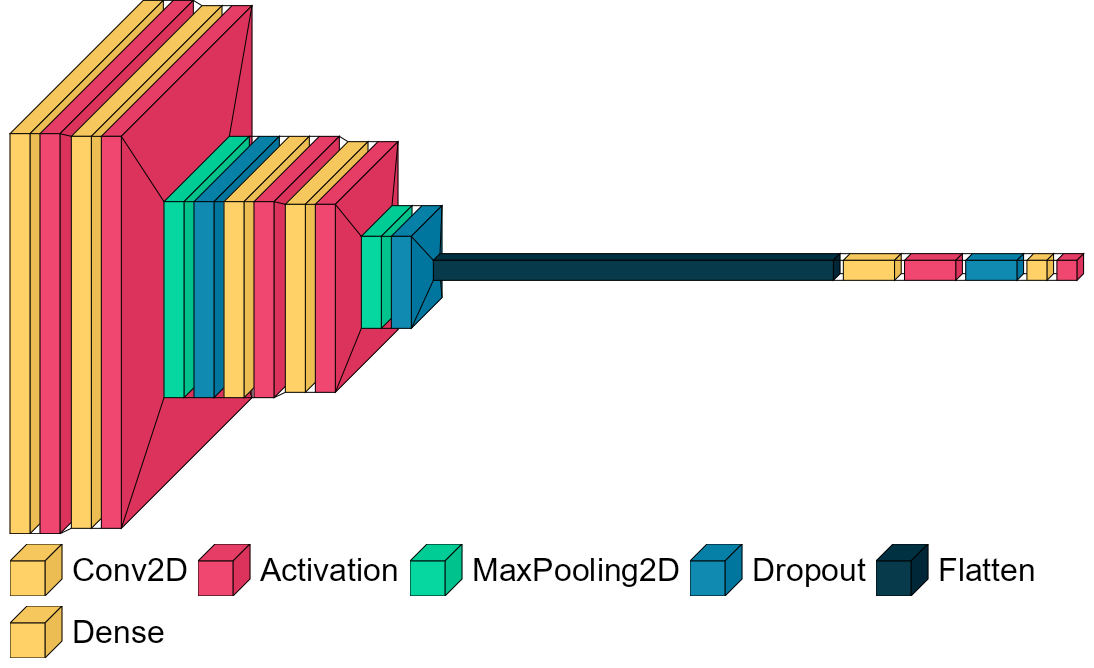

In [6]:
from PIL import ImageFont
import visualkeras

font = ImageFont.truetype("arial.ttf", 32)  # using comic sans is strictly prohibited!
visualkeras.layered_view(model, legend=True, font=font)  # font is optional!

In [9]:
visualkeras.graph_view(model)

AttributeError: 'Sequential' object has no attribute '_layers'